In [6]:
import Algorithmia
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [7]:
'''
clean_list=[]

input={
    'domains':'cnn.com',
    'topic':'politics',
    'q':'',
    'qInTitle':'',
    'content':'false',
    'page':'1',
    'author_only':'false'
    
}
client = Algorithmia.client('simObWFrFta7+ieUoXMwV1UBjEd1')
algo = client.algo('specrom/Historical_News_API/0.2.2')
raw_dict = algo.pipe(input).result
print("Total results found: ", raw_dict["totalResults"])
clean_list = clean_list + raw_dict["Article"]
'''

'\nclean_list=[]\n\ninput={\n    \'domains\':\'cnn.com\',\n    \'topic\':\'politics\',\n    \'q\':\'\',\n    \'qInTitle\':\'\',\n    \'content\':\'false\',\n    \'page\':\'1\',\n    \'author_only\':\'false\'\n    \n}\nclient = Algorithmia.client(\'simObWFrFta7+ieUoXMwV1UBjEd1\')\nalgo = client.algo(\'specrom/Historical_News_API/0.2.2\')\nraw_dict = algo.pipe(input).result\nprint("Total results found: ", raw_dict["totalResults"])\nclean_list = clean_list + raw_dict["Article"]\n'

In [8]:
'''news_df=pd.DataFrame(clean_list)
news_df.head()
#news_df.to_csv('chumma.csv')'''

"news_df=pd.DataFrame(clean_list)\nnews_df.head()\n#news_df.to_csv('chumma.csv')"

In [9]:
'''news_df=news_df[['title','description','publishedAt']]
news_df
'''

"news_df=news_df[['title','description','publishedAt']]\nnews_df\n"

In [10]:
news_df=pd.read_csv('Election_CNN_News.csv')
news_df

,Unnamed: 0,title,description,publishedAt
0,0,"Jobless claims fall to 751,000 in last report ...","Some 751,000 Americans filed first-time unempl...",2020-10-29
1,1,Early voting: Supreme Court moves in Pennsylva...,The Supreme Court on Wednesday allowed Pennsyl...,2020-10-29
2,2,These two counties could decide Florida - CNN ...,CNN's John Avlon shows how Pinellas and Hillsb...,2020-10-29
3,3,"Jobless claims fall to 751,000 in last report ...","Some 751,000 Americans filed first-time unempl...",2020-10-29
4,4,US election 2020: What India thinks of the US ...,Narendra Modi has gone out of his way to woo D...,2020-10-29
...,...,...,...,...
1164,1164,Trump seeks to delegitimize vote even as his c...,The morning after he declared from the White H...,2020-11-04
1165,1165,6 early thoughts about 2020 voters - CNNPolitics,Even as the fight for the White House continue...,2020-11-04
1166,1166,Trump seeks to delegitimize vote even as his c...,The morning after he declared from the White H...,2020-11-04
1167,1167,"Cori Bush, Black Lives Matter activist, become...","Cori Bush, a progressive community leader and ...",2020-11-04


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
title_list=news_df['title'].str.cat(sep='')

In [13]:
from nltk.tokenize import word_tokenize
tok_title= word_tokenize(title_list)

In [14]:
nltk.download('stopwords')
corpus=[]
corpus=[word for word in tok_title]

new_stop_words=["'s","n't",'opinion','Video']

for i in corpus:
    if "CNN" in i:
        new_stop_words.append(i)



new_stop_words=list(set(new_stop_words))
new_stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['CNNCan',
 'CNNPoliticsAll',
 'CNNElection',
 'CNNPoliticsFor',
 'CNNBattle',
 'CNNPoliticsNo',
 'CNNSupreme',
 'CNNBiden',
 'CNNPoliticsWhite',
 'CNNPoliticsLeslie']

In [15]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
stop=stop.union(new_stop_words)


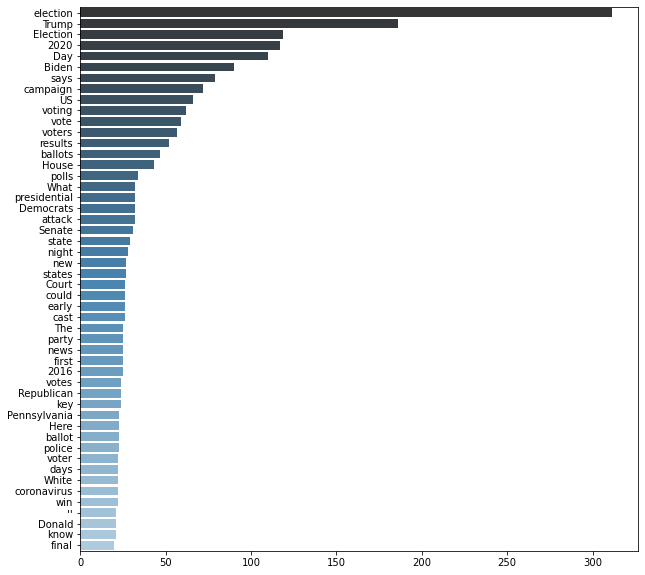

In [16]:
from collections import Counter
from string import punctuation

corpus=[char for char in corpus if (char not in punctuation)]
corpus=[char for char in corpus if (char not in stop)]
counter=Counter(corpus)
most=counter.most_common()

x,y=[],[]

for word, count in most[:50]:
    if word not in stop:
        x.append(word)
        y.append(count)
        
fig_dims=10,10
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x=y,y=x, ax=ax,palette=("Blues_d"))


In [17]:
'''from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    text_tokens=word_tokenize(text)
    removed_tokens=[char for char in text_tokens if (char not in punctuation)]
    removed_tokens=[char for char in text_tokens if (char not in stop)]
    
    stop_removed_text=(" ").join(removed_tokens)
    return stop_removed_text
news_df['title']=news_df['title'].apply(lambda x: remove_stopwords(x))
'''

'from nltk.tokenize import word_tokenize\ndef remove_stopwords(text):\n    text_tokens=word_tokenize(text)\n    removed_tokens=[char for char in text_tokens if (char not in punctuation)]\n    removed_tokens=[char for char in text_tokens if (char not in stop)]\n    \n    stop_removed_text=(" ").join(removed_tokens)\n    return stop_removed_text\nnews_df[\'title\']=news_df[\'title\'].apply(lambda x: remove_stopwords(x))\n'

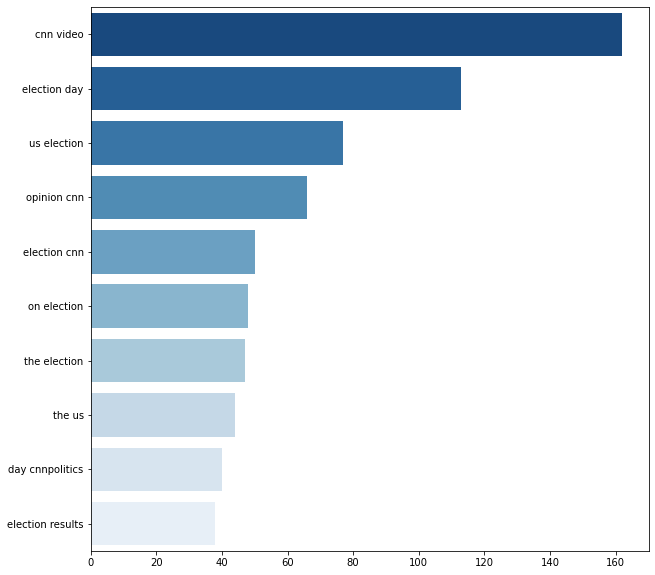

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(news_df['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))

fig_dims=10,10
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x=y,y=x, ax=ax,palette=("Blues_r"))


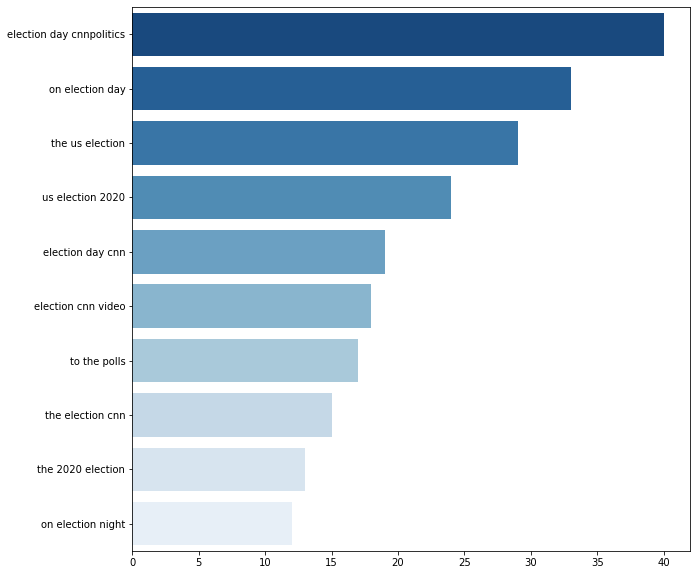

In [19]:
top_n_trigrams=get_top_ngram(news_df['title'],3)[:10]
x,y=map(list,zip(*top_n_trigrams))

fig_dims=10,10
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x=y,y=x, ax=ax,palette=("Blues_r"))

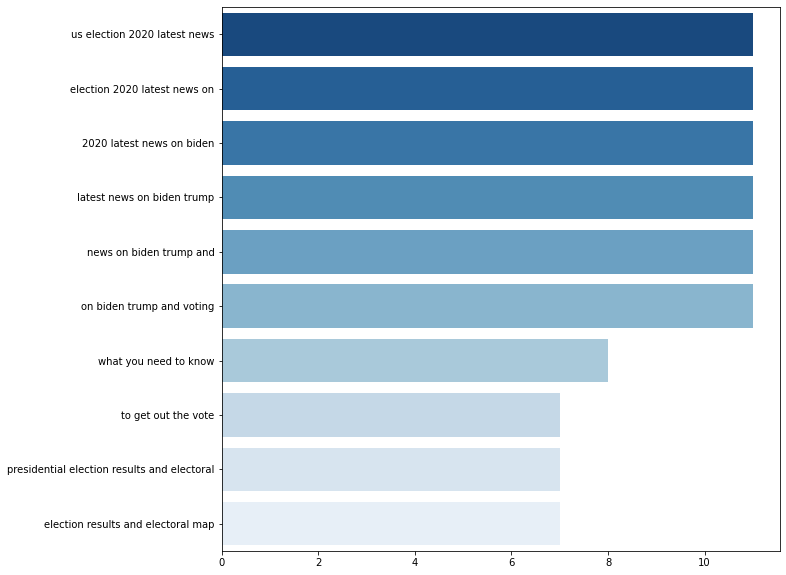

In [20]:
top_n_pentagrams=get_top_ngram(news_df['title'],5)[:10]
x,y=map(list,zip(*top_n_pentagrams))

fig_dims=10,10
fig,ax=plt.subplots(figsize=fig_dims)
sns.barplot(x=y,y=x, ax=ax,palette=("Blues_r"))

In [21]:
#to do- wordcloud
#- LDA
#-Sentiment Analysis

In [22]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


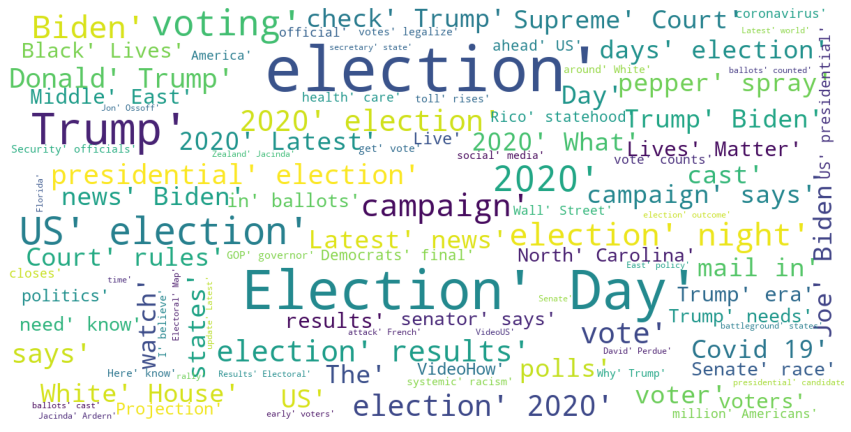

In [23]:
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud=WordCloud(background_color='white', stopwords=stop, max_words=100,
                        max_font_size=30,scale=3,random_state=1)
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

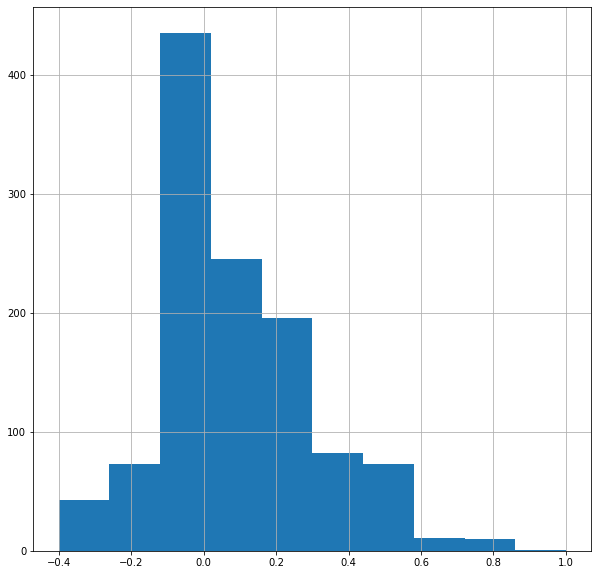

In [24]:
#Sentiment Analysis
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

news_df['polarity']=news_df['description'].apply(lambda x: polarity(x))

news_df['polarity'].hist(figsize=(10,10))


In [25]:
def sentiment(x):
    if x>0:
        return 'pos'
    elif x==0:
        return 'neutral'
    else:
        return 'neg'

news_df['sentiment']=news_df['polarity'].apply(lambda x: sentiment(x))

news_df[news_df['sentiment']=='neg']['title'].values[:5]

array(['Early voting: Supreme Court moves in Pennsylvania and North Carolina set up potential post-election court fight over mail-in ballots - CNNPolitics',
       'US election 2020: What India thinks of the US election (opinion) - CNN',
       "Where Trump and Biden stand in CNN's latest poll of polls",
       "Biden says 'no excuse for looting' in wake of Wallace shooting - CNN Video",
       'Stay inside this Halloween with your household, doctors say - CNN'],
      dtype=object)